In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from knn import KNN

# KNN (K Nearest Neigber)

- Apple : 0
- Banana : 1
- watermelon : 2

<img src="https://fruityland.co/wp-content/uploads/2021/01/Granny-smith-green-apple-FL.jpg" width="200px" height="180px">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Banana-Single.jpg/220px-Banana-Single.jpg" width="200px" height="180px">

<img src="https://starfishmarket.com/wp-content/uploads/2015/11/watermelon-580x437.jpg" width="200px" height="180px">


In [9]:
def generate_dataset(n):
  apple_width = np.random.normal(6, 1, n)
  apple_lenght = np.random.normal(7, 1, n)
  banana_width = np.random.normal(3, 1, n)
  banana_lenght = np.random.normal(10, 1, n)
  watermelon_width = np.random.normal(13, 1, n)
  watermelon_lenght = np.random.normal(20, 1, n)

  width = np.concatenate((apple_width, banana_width, watermelon_width))
  lenght = np.concatenate((apple_lenght, banana_lenght, watermelon_lenght))
  X = np.array([width, lenght]).T

  Y_apple =  np.zeros(n, dtype='int')
  Y_banana = np.ones(n, dtype='int')
  Y_watermelon = np.ones(n, dtype='int') * 2
  Y = np.concatenate((Y_apple, Y_banana, Y_watermelon))

  return X, Y

In [10]:
X_train, Y_train = generate_dataset(200)

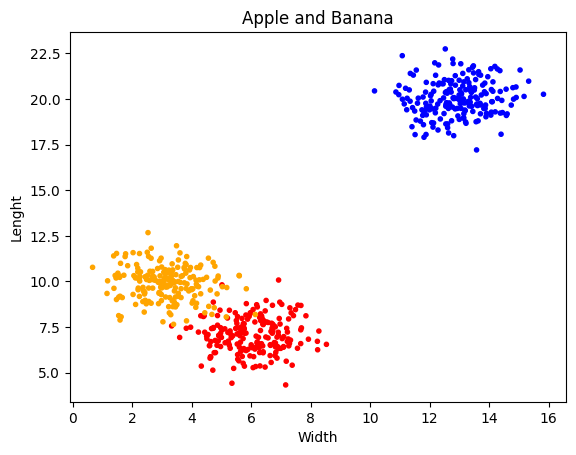

In [11]:
cmap = ['red', 'orange', 'blue']
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=ListedColormap(cmap), marker='.')
plt.title('Apple and Banana')
plt.xlabel('Width')
plt.ylabel('Lenght')
plt.show()

In [12]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [13]:
item1 = np.array([9, 15])
item2 = np.array([5, 8])
item3 = np.array([5, 12])
item4 = np.array([3, 4])
inputs = [item1, item2, item3, item4]
outputs = knn.predict(inputs)

In [14]:
for result in outputs:
  if result == 0:
    print('Apple🍎')
  elif result == 1:
    print('Banana🍌')
  elif result == 2:
    print('Watermelon🍉')

Watermelon🍉
Apple🍎
Banana🍌
Apple🍎
